### Preprocessing

In [1]:
# Get all the up to date data
from modules.update_data import update_data, clone_data

clone_data()
#update_data()

In [2]:
from modules.dataset_initialization import dataset_initialization
from modules.ids_formation import ids_formation
from modules.players_data import players_data
import pandas as pd
import pickle

PATH = '../data/Fantasy-Premier-League/data/'
PATH2 = '../data/FPL-ID-Map/Master.csv'

team_stats_dict, fixtures, players_raw, teams, ids, seasons = dataset_initialization(PATH)
id_dict_df = ids_formation(PATH, PATH2)
#id_dict_df = pd.read_csv(PATH2)
#id_dict_df[['19-20','20-21', '21-22', '22-23', 'understat']] = id_dict_df[['19-20','20-21', '21-22', '22-23', 'understat']].fillna(0.0).astype(int)

player_info_dict = players_data(id_dict_df, ids, PATH)
#with open('./created_datasets/player_info_dict.pkl', 'rb') as f:
#    player_info_dict = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../data/Fantasy-Premier-League/data/2023-24/understat/Joelinton_87.csv'

### Non-penalty goals

In [3]:
from modules.feature_extraction import npg_dataset_creation

# Create the npgoals dataset
gw_no_lim = 4
npg_dataset = npg_dataset_creation(seasons, players_raw, player_info_dict, teams, team_stats_dict, fixtures, gw_no_lim)
npg_dataset.to_csv('./created_datasets/npg_dataset538.csv', index=False)

100%|██████████| 484/484 [13:38<00:00,  1.69s/it]


Dataset size:  (52049, 16)


In [4]:
from modules.useful_functions2 import proj_scores, spis

proj_scores_df = pd.read_csv('soccer-spi/spi_matches.csv')
proj_scores_df = proj_scores_df[proj_scores_df['league_id']==2411]
spis(proj_scores_df, 'Arsenal', 'Man City', 2019, False)
proj_scores(proj_scores_df, 'Arsenal', 'Man City', 2019, False)

(0.77, 2.68)

{'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.016}
Mean Absolute Error = 0.23813054840787692
Mean Squared Error = 0.15250297094124468
Root Mean Squared Error = 0.39051628767728075
r2 = 0.1805206762255135

Mean Absolute Error = 0.25208678998093986
Mean Squared Error = 0.17933158948325997
Root Mean Squared Error = 0.42347560671573514
r2 = 0.1206672487222279
RMSE scores: [0.44228247 0.44311337 0.36149153 0.3672131  0.40857552]
Mean RMSE: 0.40453519854202546
Index(['npg_ratel100', 'npxGp90l100', 'sh_ratel100', 'npg_rate', 'npxGp90',
       'npxGp90(L4)', 'shp90', 'teamnpxGp90', 'opp_npxGAp90', 'opp_spi_team',
       'spi_team', 'minutes', 'was_home', 'npg'],
      dtype='object')


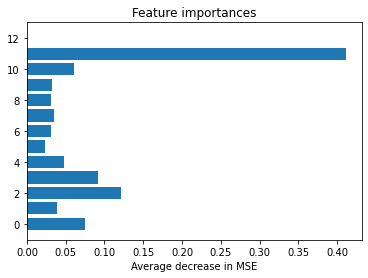

In [26]:
from modules.feature_extraction import npg_dataset_creation

# Create the npgoals dataset
gw_no_lim = 4
#npg_dataset = npg_dataset_creation(seasons, players_raw, player_info_dict, teams, team_stats_dict, fixtures, gw_no_lim)
#npg_dataset.to_csv('./created_datasets/npg_dataset538.csv', index=False)

from modules.model_creation import model_creation
import pandas as pd

#Get the dataset 
npg_dataset = pd.read_csv('./created_datasets/npg_dataset538.csv')
npg_dataset = npg_dataset.drop(['proj_goals', 'opp_proj_goals'], axis=1)
npg_dataset = npg_dataset[npg_dataset['npxGp90']>0.3]
npg_dataset = npg_dataset.dropna()
xgb_model = model_creation(npg_dataset, 13, 'xgb', [300,400,600,800], [2,3,4], [0.01, 0.012, 0.014, 0.016])

In [5]:
import pickle

filename = './models/npgoals_xgb_model6.sav'
model5 = pickle.load(open(filename, 'rb'))

In [35]:
npg_ratel100 = 0.9
npxGp90l100 = 0.88
sh_ratel100 = 3.61
npg_rate = 0.95
npxGp90 = 0.85
npxGp90l4 = 0.83
shp90 = 3.73 
teamnpxGp90 = 2.1
opp_npxGAp90 = 1
spi_opp = 65
spi = 90
minutes = 77
was_home = True

npg_ratel1002 = 0.63 
npxGp90l1002 = 0.62
sh_ratel1002 = 3.61
npg_rate2 = 0.45
npxGp902 = 0.53
npxGp90l42 = 0.55
shp902 = 3.14 
teamnpxGp902 = 2
opp_npxGAp902 = 1
spi_opp2 = 65
spi2 = 85
minutes2 = 84 
was_home2 = True

print('Haaland')
#print(xgb_model2.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, minutes, was_home]]))
#print(xgb_model3.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, minutes, was_home]]))
print(model5.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, spi_opp, spi, minutes, was_home]]))
#print(model4.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, spi_opp, spi, minutes, was_home]]))
print(xgb_model.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, spi_opp, spi, minutes, was_home]]))
#print(xgb_model2.predict([[npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, minutes, was_home]]))
print()
print('Salah')
#print(xgb_model2.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(xgb_model3.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, minutes2, was_home2]]))
print(model5.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, spi_opp2, spi2, minutes2, was_home2]]))
#print(model4.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, spi_opp2, spi2, minutes2, was_home2]]))
print(xgb_model.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, spi_opp2, spi2, minutes2, was_home2]]))
#print(xgb_model2.predict([[npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, minutes2, was_home2]]))

Haaland
[0.5374316]
[0.64694875]

Salah
[0.5802085]
[0.46259013]


In [19]:
import pickle

filename = './models/npgoals_xgb_model7.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

### Penalties

100%|██████████| 20/20 [01:43<00:00,  5.20s/it]


{'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.01}
Mean Absolute Error = 0.2069426461293479
Mean Squared Error = 0.11125139141524461
Root Mean Squared Error = 0.33354368741627327
r2 = 0.09553453530668987

Mean Absolute Error = 0.23361464172880025
Mean Squared Error = 0.137046950526048
Root Mean Squared Error = 0.3701985285303657
r2 = 0.009951001625142508
RMSE scores: [0.36048403 0.40483231 0.38454993 0.38363854 0.30697454]
Mean RMSE: 0.3680958704213359
Index(['team_npxG', 'oppteam_npxGA', 'was_home', 'pen_rate', 'proj_goals',
       'spi_team', 'spi_opp_team', 'team_npxGp90(L4)', 'oppteam_npxGAp90(L4)',
       'team_pens'],
      dtype='object')


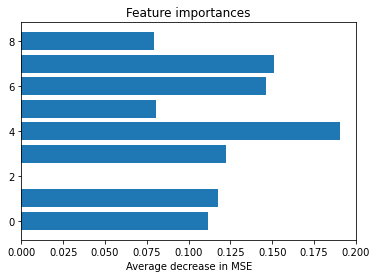

In [10]:
from modules.feature_extraction import penalties_dataset_creation
from modules.model_creation import model_creation
import pandas as pd

gw_no_limit = 4
pens_dataset = penalties_dataset_creation(seasons, fixtures, teams, team_stats_dict, gw_no_limit)
pens_dataset.to_csv('./created_datasets/pens_dataset538.csv', index=False)

#Get the dataset
pens_dataset = pd.read_csv('./created_datasets/pens_dataset538.csv')
#pens_dataset = pens_dataset.drop('pen_rate', axis=1)
pens_xgb_model2 = model_creation(pens_dataset, 9, 'xgb', [300, 400, 500, 600], [2,3,4])

In [87]:
import pickle

filename = './models/pens_xgb_model.sav'
pickle.dump(pens_xgb_model1, open(filename, 'wb'))

In [11]:
filename = './models/pens_xgb_model.sav'
pens = pickle.load(open(filename, 'rb'))

In [24]:
team_npxG = 2.1
oppteam_npxGA = 1.8
was_home = True 
pen_rate = 0.35
proj_goals = 2.2
spi_team = 90
spi_opp_team = 55
team_npxGp90l4 = 2.1
oppteam_npxGAp90l4 = 1.9

#print(pens_xgb_model.predict([[team_npxG, oppteam_npxGA, was_home, pen_rate, proj_goals, team_npxGp90l4, oppteam_npxGAp90l4]]))
print(pens.predict([[team_npxG, oppteam_npxGA, was_home, pen_rate, proj_goals, team_npxGp90l4, oppteam_npxGAp90l4]]))
print(pens_xgb_model2.predict([[team_npxG, oppteam_npxGA, was_home, pen_rate, proj_goals, spi_team, spi_opp_team, team_npxGp90l4, oppteam_npxGAp90l4]]))
#print(pens_xgb_model1.predict([[team_npxG, oppteam_npxGA, was_home, pen_rate, proj_goals, team_npxGp90l4, oppteam_npxGAp90l4]]))

[0.22384809]
[0.15933712]


In [88]:
from modules.useful_functions import xpens_2022

xpens_2022 

{'Arsenal': [(13, 1)],
 'Aston Villa': [(40, 0.4)],
 'Brentford': [(80, 1), (95, 0)],
 'Brighton': [(116, 0.98), (104, 0.02)],
 'Bournemouth': [(105, 1)],
 'Chelsea': [(130, 1), (142, 0)],
 'Crystal Palace': [(160, 1), (166, 0)],
 'Everton': [(191, 1)],
 'Leeds': [(227, 0), (225, 1)],
 'Leicester': [(255, 0.5), (259, 0.4), (261, 0.1)],
 'Liverpool': [(283, 1), (282, 0)],
 'Man City': [(318, 1), (303, 0)],
 'Man Utd': [(335, 0.75), (333, 0.25)],
 'Newcastle': [(356, 1), (354, 0)],
 "Nott'm Forest": [(315, 1)],
 'Southampton': [(407, 1)],
 'Spurs': [(427, 1), (428, 0)],
 'Fulham': [(210, 1), (346, 0)],
 'West Ham': [(464, 0.9), (465, 0.1)],
 'Wolves': [(476, 0.8), (480, 0.2)]}

In [2]:
xpens_2022['Man City']

[(318, 1), (303, 0)]

### Assists

In [44]:
from modules.feature_extraction import assists_dataset_creation

gw_no_lim = 4
#assists_dataset = assists_dataset_creation(seasons, player_info_dict, teams, players_raw, team_stats_dict, fixtures, gw_no_lim)
#assists_dataset.to_csv('./created_datasets/assists_dataset.csv', index=False)

100%|██████████| 426/426 [04:42<00:00,  1.51it/s]


Dataset size:  (47783, 14)


In [25]:
from modules.feature_extraction import assists_dataset_creation

gw_no_lim = 4
assists_dataset = assists_dataset_creation(seasons, player_info_dict, teams, players_raw, team_stats_dict, fixtures, gw_no_lim)
assists_dataset.to_csv('./created_datasets/assists_dataset538.csv', index=False)

100%|██████████| 433/433 [07:20<00:00,  1.02s/it]


Dataset size:  (51554, 15)


{'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.014}
Mean Absolute Error = 0.09615219910603438
Mean Squared Error = 0.05537788770965064
Root Mean Squared Error = 0.2353250681709253
r2 = 0.11350266494397343

Mean Absolute Error = 0.10008243871548374
Mean Squared Error = 0.05847443780136633
Root Mean Squared Error = 0.2418148833330288
r2 = 0.08964261882131741
RMSE scores: [0.25365492 0.24487537 0.23081092 0.23928428 0.23241326]
Mean RMSE: 0.24020774804319772
Index(['assist_ratel100', 'xAp90l100', 'kp_ratel100', 'assist_rate', 'xAp90',
       'xAp90(L4)', 'kpp90', 'teamnpxGp90', 'opp_npxGp90', 'spi_opp_team',
       'opp_npxGAp90', 'spi_team', 'minutes', 'was_home', 'assists'],
      dtype='object')


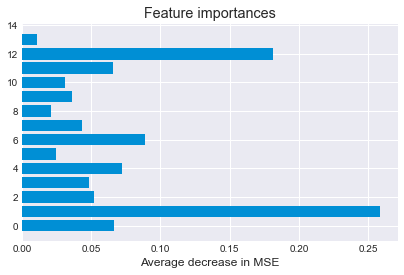

In [46]:
from modules.model_creation import model_creation
import pandas as pd

#Get the dataset
assists_dataset = pd.read_csv('./created_datasets/assists_dataset538.csv')
assists_dataset = assists_dataset[['assist_ratel100', 'xAp90l100', 'kp_ratel100', 'assist_rate', 'xAp90',
       'xAp90(L4)', 'kpp90', 'teamnpxGp90', 'opp_npxGp90', 'spi_opp_team',
       'opp_npxGAp90', 'spi_team', 'minutes', 'was_home', 'assists']]
axgb_model1 = model_creation(assists_dataset, 14, 'xgb', [200,300,400,600], [3,4,5,6], [0.01, 0.012, 0.014, 0.016])

In [28]:
assist_ratel100 = 0.24 
xAp90l100 = 0.23
kp_ratel100 = 2.6
assist_rate = 0.21
xAp90 = 0.38
xAp90l4 = 0.4
kpp90 = 2.62 
spi_team = 85
spi_opp = 60
teamnpxGp90 = 1.8
opp_npxGp90 = 1
opp_npxGAp90 = 1.7
minutes = 84 
was_home = True

assist_ratel1002 = 0.42
xAp90l1002 = 0.57
kp_ratel1002 = 3.6
assist_rate2 = 0.58
xAp902 = 0.59
xAp90l42 = 0.65
kpp902 = 3.52 
spi_team2 = 90
spi_opp2 = 60
teamnpxGp902 = 2.1
opp_npxGp902 = 1
opp_npxGAp902 = 1.65
minutes2 = 70
was_home2 = False

print('Bruno')
#print(assists2.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
#print(assists.predict([[xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print(axgb_model1.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, spi_opp, opp_npxGAp90, spi_team, minutes, was_home]]))
#print(axgb_model6.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
#print(assists2.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print()
print('KDB')
#print(assists2.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(assists.predict([[xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
print(axgb_model1.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, spi_opp2, opp_npxGAp902, spi_team2, minutes2, was_home2]]))
#print(axgb_model6.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(assists2.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))


Bruno
[0.2823267]

KDB
[0.47451156]


In [77]:
assist_ratel100 = 0.25
xAp90l100 = 0.32
kp_ratel100 = 2.4
assist_rate = 0.06
xAp90 = 0.33
xAp90l4 = 0.33
kpp90 = 2.16 
teamnpxGp90 = 2
opp_npxGp90 = 1
opp_npxGAp90 = 1.8
minutes = 81 
was_home = True

assist_ratel1002 = 0.14
xAp90l1002 = 0.26
kp_ratel1002 = 2.1
assist_rate2 = 0.2
xAp902 = 0.39
xAp90l42 = 0.39
kpp902 = 2.97 
teamnpxGp902 = 1.8
opp_npxGp902 = 1.8
opp_npxGAp902 = 0.8
minutes2 = 84 
was_home2 = True

print('TAA')
print(axgb_model1.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print(assists.predict([[xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print(assists2.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
#print(axgb_model6.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
#print(assists2.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print()
print('Trippier')
print(axgb_model1.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
print(assists.predict([[ xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
print(assists2.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(axgb_model6.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(assists2.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))


TAA
[0.32780632]
[0.21941015]
[0.36353144]

Trippier
[0.23753595]
[0.31681734]
[0.22469221]


In [29]:
import pickle

filename = './models/assists_xgb_model3.sav'
pickle.dump(axgb_model1, open(filename, 'wb'))

### Team goals

In [2]:
from modules.feature_extraction import team_goals_dataset_creation

gw_no_lim = 4
team_goals_dataset = team_goals_dataset_creation(seasons, fixtures, teams, team_stats_dict, gw_no_lim)
team_goals_dataset.to_csv('./created_datasets/team_goals_dataset.csv', index=False)

{'n_estimators': 400, 'max_depth': 4}
Mean Absolute Error = 0.877909524441294
Mean Squared Error = 1.2839078805009725
Root Mean Squared Error = 1.1330965892195477
r2 = 0.19825278365747656

Mean Absolute Error = 0.9544495124937843
Mean Squared Error = 1.4948952007630927
Root Mean Squared Error = 1.2226590697177577
r2 = 0.08783561345745416
Index(['team1_npxG', 'team2_npxGA', 'was_home', 'team1_npxGp90(L4)',
       'team2_npxGAp90(L4)', 'team1_goals'],
      dtype='object')


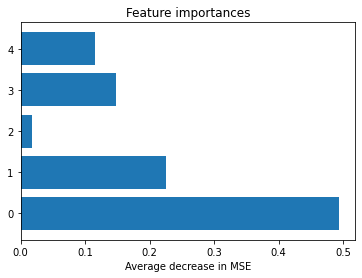

In [11]:
from modules.model_creation import model_creation
import pandas as pd

#Get the dataset
team_goals_dataset = pd.read_csv('./created_datasets/team_goals_dataset.csv')
team_goals_xgb_model = model_creation(team_goals_dataset, 5, 'xgb', [300,400,500,600], [2,3,4], [0.008, 0.01, 0.012])

In [28]:
import pickle

filename = './models/team_goals_xgb_model.sav'
pickle.dump(team_goals_xgb_model, open(filename, 'wb'))

### Bonus

In [3]:
from modules.feature_extraction import bps_dataset_creation

gw_no_lim = 4
bps_dataset = bps_dataset_creation(seasons, player_info_dict, teams, players_raw, team_stats_dict, fixtures, gw_no_lim)
bps_dataset.to_csv('./created_datasets/bps_dataset.csv', index=False)

100%|██████████| 430/430 [04:06<00:00,  1.74it/s]


{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}
Mean Absolute Error = 0.24864321314128135
Mean Squared Error = 0.2903319314110684
Root Mean Squared Error = 0.5388245831539875
r2 = 0.15096917214266214

Mean Absolute Error = 0.24567517831132055
Mean Squared Error = 0.28618606317229567
Root Mean Squared Error = 0.5349636092037435
r2 = 0.13240082089787253
Index(['bonusp90', 'position', 'npxGp90', 'xAp90', 'npxGAp90', 'opp_npxGp90',
       'opp_npxGAp90', 'minutes', 'was_home', 'bonus'],
      dtype='object')


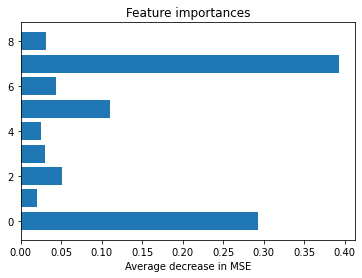

In [26]:
from modules.model_creation import model_creation
import pandas as pd

#Get the dataset
bps_dataset = pd.read_csv('./created_datasets/bps_dataset.csv')
bps_xgb_model2 = model_creation(bps_dataset, 9, 'xgb', [400,500,600,700], [3,4,5,6], [0.008, 0.01, 0.012])

In [64]:
import pickle

filename = './models/bps_xgb_model.sav'
pickle.dump(bps_xgb_model2, open(filename, 'wb'))

In [62]:
bonusp90 = 0.75
position = 3
npxGp90 = 0.17
xAp90 = 0.59 
npxGAp90 = 0.8 
opp_npxGp90 = 1.2
opp_npxGAp90 = 1.4 
minutes = 79
was_home = True

print(bps_xgb_model.predict([[bonusp90,position,npxGp90,xAp90,npxGAp90,opp_npxGp90,opp_npxGAp90,minutes,was_home]]))
print(bps_xgb_model1.predict([[bonusp90,position,npxGp90,xAp90,npxGAp90,opp_npxGp90,opp_npxGAp90,minutes,was_home]]))
print(bps_xgb_model2.predict([[bonusp90,position,npxGp90,xAp90,npxGAp90,opp_npxGp90,opp_npxGAp90,minutes,was_home]]))

[0.5506361]
[0.7412933]
[0.79441285]


### Saves

In [3]:
from modules.feature_extraction import saves_dataset_creation

gw_no_lim = 4
saves_dataset = saves_dataset_creation(seasons, player_info_dict, players_raw, teams, team_stats_dict, fixtures, gw_no_lim)
saves_dataset.to_csv('./created_datasets/saves_dataset.csv', index=False)

100%|██████████| 430/430 [01:59<00:00,  3.59it/s]


{'n_estimators': 700, 'max_depth': 2, 'learning_rate': 0.01}
Mean Absolute Error = 0.8319897286418387
Mean Squared Error = 1.8137962414026567
Root Mean Squared Error = 1.3467725277130718
r2 = 0.5823438862951176

Mean Absolute Error = 0.8701776131326193
Mean Squared Error = 1.9158874663350323
Root Mean Squared Error = 1.384155867789113
r2 = 0.5440027292501437
Index(['savesp90', 'opp_proj_goals', 'npxGAp90', 'opp_npxGp90', 'npxGAp90(L4)',
       'opp_npxGp90(L4)', 'minutes', 'was_home', 'saves'],
      dtype='object')


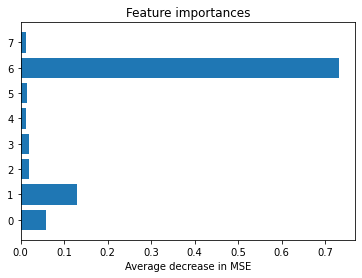

In [9]:
from modules.model_creation import model_creation
import pandas as pd

#Get the dataset
saves_dataset = pd.read_csv('./created_datasets/saves_dataset.csv')
saves_xgb_model4 = model_creation(saves_dataset, 8, 'xgb', [700], [2,3,4,5], [0.008, 0.01, 0.012, 0.014])

In [26]:
import pickle

filename = './models/saves_xgb_model.sav'
pickle.dump(saves_xgb_model3, open(filename, 'wb'))

In [25]:
from modules.useful_functions import save_points
save_points(-0.07)

-6.025343698222532e-05

In [24]:
spg = 1.5
opp_proj_goals = 0.55
npxGAp90 = 0.8 
opp_npxGp90 = 1
npxGAp90l4 = 0.8
opp_npxGp90l4 = 1
minutes = 18
was_home = True

print(saves_xgb_model.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))
print(saves_xgb_model1.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))
print(saves_xgb_model2.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))
print(saves_xgb_model3.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))
print(saves_xgb_model4.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))

[-0.07073015]
[-0.03735984]
[-0.11968241]
[-0.07841796]
[-0.02939505]


### get saved models

In [75]:
%%capture

# Get the saved models
import pickle
import pandas as pd

filename = './models/npgoals_xgb_model.sav'
npgoals = pickle.load(open(filename, 'rb'))

filename = './models/npgoals_xgb_model2.sav'
npgoals2 = pickle.load(open(filename, 'rb'))

filename = './models/assists_xgb_model.sav'
assists = pickle.load(open(filename, 'rb'))

filename = './models/assists_xgb_model2.sav'
assists2 = pickle.load(open(filename, 'rb'))

filename = './models/assists_xgb_model3.sav'
assists3 = pickle.load(open(filename, 'rb'))

filename = './models/team_goals_xgb_model.sav'
team_goals = pickle.load(open(filename, 'rb'))

filename = './models/bps_xgb_model.sav'
bonus = pickle.load(open(filename, 'rb'))

filename = './models/saves_xgb_model.sav'
saves = pickle.load(open(filename, 'rb'))

filename = './models/pens_xgb_model.sav'
pens = pickle.load(open(filename, 'rb'))
#pen_df_2021 = pd.read_csv('./created_datasets/pen_df_2021.csv')

In [1]:
from modules.dataset_initialization import dataset_initialization
from modules.ids_formation import ids_formation
from modules.players_data import players_data
import pandas as pd
import pickle

PATH = '../data/Fantasy-Premier-League/data/'
PATH2 = '../data/FPL-ID-Map/Master.csv'

team_stats_dict, fixtures, players_raw, teams, ids, seasons = dataset_initialization(PATH)

In [13]:
from modules.useful_functions import npxGAp90, previous_team_id, pens_per_game, avg

import requests
import pandas as pd

team = 'Arsenal'
gw_no_lim = 4
kickoff_time = '2023-02-15T18:30:00Z'
season = '2023-24'

npxGAp90(team, kickoff_time, season, team_stats_dict, gw_no_lim)
avg(pens_per_game(fixtures, season, team_stats_dict, teams, 11, gw_no_lim)[0])

0.10526315789473684

In [2]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

You should consider upgrading via the 'C:\Users\spval\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [16]:
import asyncio
import pandas as pd
import aiohttp
from understat import Understat
from modules.useful_functions import npxGp90, npg_rate_season, rates100, finishing_rate

async def player_understat_file(id):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        # Using **kwargs
        player_matches = await understat.get_player_matches(id)
        player_matches = pd.DataFrame(player_matches)
        cols=[i for i in player_matches.columns if i not in ['position', 'h_team', 'a_team', 'date']]
        for col in cols:
            player_matches[col]=pd.to_numeric(player_matches[col])
        return player_matches
        

loop = asyncio.get_event_loop()
df = loop.run_until_complete(player_understat_file(5543))
kickoff_time = '2023-08-12T19:00:00Z'
season = 2023
npxGp90(df, 2022, kickoff_time, 4)
npg_rate_season(df, kickoff_time, season)
print(rates100(df, kickoff_time, 'npxG') / rates100(df, kickoff_time, 'shots'))
finishing_rate(df)

0.17933756224663247


0.8456861556655959

In [20]:
teams2023[teams2023['id']==1]['short_name'].iloc[0]

NameError: name 'teams2023' is not defined

In [2]:
import pandas as pd
import requests
import numpy as np
from modules.useful_functions import team_id, fixture_info2, avg

def convert(lst):     
    return ' '.join(str(item) for item in lst)

home = {
    True: '(H): ',
    False: '(A): '
}
season = '2023-24'
master_path = '../data/FPL-ID-Map/Master.csv'
master = pd.read_csv(master_path)
df = players_raw[season]
teams2023 = teams[season]
horizon = 3
next_gw = 1
gws = list(range(next_gw, next_gw + horizon))
ids2023 = []
short_teams = []
positions = []
prices = []
fix = [[], [], []]
xmins = [[], [], []]
dmins = [[], [], []]
likelihood = [[], [], []]

for row in range(master.shape[0]):
    try:
        df_aux = df[df['code']==master['code'].iloc[row]]
        id = df_aux['id'].iloc[0]
        ids2023.append(id)
    except:
        ids2023.append(np.NaN)
master['23-24'] = ids2023
master.to_csv('Master.csv')

master = master[~master['23-24'].isna()]

for row in range(master.shape[0]):
    df_aux = df[df['code']==master['code'].iloc[row]]
    id = df_aux['id'].iloc[0]
    tid = team_id(id, season, players_raw)
    short_teams.append(teams2023[teams2023['id']==tid]['short_name'].iloc[0])
    positions.append(df_aux['element_type'].iloc[0])
    prices.append(df_aux['now_cost'].iloc[0])
    for gw in gws:
        afix = []
        admins = []
        alikelihood = []
        fix_list = fixture_info2(tid, season, gw, fixtures, teams)
        for i in range(len(fix_list)):
            opp_team, was_home, kickoff_time = fixture_info2(tid, season, gw, fixtures, teams)[i]
            afix.append(home[was_home] + teams2023[teams2023['name']==opp_team]['short_name'].iloc[0])
            admins.append(90)
            alikelihood.append(1)
        fix[gw-next_gw].append(convert(afix))
        dmins[gw-next_gw].append(convert(admins))
        likelihood[gw-next_gw].append(convert(alikelihood))
        xmins[gw-next_gw].append(avg(admins))

master['Team'] = short_teams
master['Pos'] = positions
master['Price'] = prices

for gw in gws:
    master[str(gw)+ '_fix'] = fix[gw-next_gw]
    master[str(gw)+ '_xmins'] = xmins[gw-next_gw]
    master[str(gw)+ '_dmins'] = dmins[gw-next_gw]
    master[str(gw)+ '_likelihood'] = likelihood[gw-next_gw]

review_detailed = master.drop(['code', 'first_name', 'second_name', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', 'fbref', 'understat', 'transfermarkt'], axis=1)
review_detailed = review_detailed.rename(columns={'web_name': 'Name', '23-24': 'ID'})


fpl_review = pd.DataFrame()
pos = {
    1: 'G',
    2: 'D',
    3: 'M',
    4: 'F'
}
fpl_review['Pos'] = [pos[review_detailed['Pos'].iloc[x]] for x in range(review_detailed.shape[0])] 
fpl_review['ID'] = [review_detailed['ID'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['Name'] = [review_detailed['Name'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['BV'] = [review_detailed['Price'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['SV'] = [review_detailed['Price'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['Team'] = [teams2023[teams2023['short_name']==review_detailed['Team'].iloc[x]]['name'].iloc[0] for x in range(review_detailed.shape[0])]
for gw in gws:
    fpl_review[str(gw)+ '_xmins'] = [review_detailed[str(gw)+ '_xmins'].iloc[x] for x in range(review_detailed.shape[0])] 
    fpl_review[str(gw)+ '_Pts'] = [0] * review_detailed.shape[0]

review_df = fpl_review


In [3]:
fpl_review = pd.DataFrame()
pos = {
    1: 'G',
    2: 'D',
    3: 'M',
    4: 'F'
}
fpl_review['Pos'] = [pos[review_detailed['Pos'].iloc[x]] for x in range(review_detailed.shape[0])] 
fpl_review['ID'] = [review_detailed['ID'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['Name'] = [review_detailed['Name'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['BV'] = [review_detailed['Price'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['SV'] = [review_detailed['Price'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['Team'] = [teams2023[teams2023['short_name']==review_detailed['Team'].iloc[x]]['name'].iloc[0] for x in range(review_detailed.shape[0])]
for gw in gws:
    fpl_review[str(gw)+ '_xmins'] = [review_detailed[str(gw)+ '_xmins'].iloc[x] for x in range(review_detailed.shape[0])] 
    fpl_review[str(gw)+ '_Pts'] = [0] * review_detailed.shape[0]

review_df = fpl_review


In [4]:
review_df

,Pos,ID,Name,BV,SV,Team,1_xmins,1_Pts,2_xmins,2_Pts,3_xmins,3_Pts
0,M,142.0,Milner,50,50,Brighton,90.0,0,90.0,0,90.0,0
1,G,347.0,Carson,40,40,Man City,90.0,0,90.0,0,90.0,0
2,D,265.0,Tarkowski,45,45,Everton,90.0,0,90.0,0,90.0,0
3,G,448.0,Hennessey,40,40,Nott'm Forest,90.0,0,90.0,0,90.0,0
4,G,384.0,Heaton,40,40,Man Utd,90.0,0,90.0,0,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
504,M,125.0,Buonanotte,50,50,Brighton,90.0,0,90.0,0,90.0,0
505,F,490.0,Osula,45,45,Sheffield Utd,90.0,0,90.0,0,90.0,0
506,M,418.0,Kuol,45,45,Newcastle,90.0,0,90.0,0,90.0,0
507,M,118.0,Trevitt,45,45,Brentford,90.0,0,90.0,0,90.0,0


In [5]:
review_detailed

,Name,ID,Team,Pos,Price,1_fix,1_xmins,1_dmins,1_likelihood,2_fix,2_xmins,2_dmins,2_likelihood,3_fix,3_xmins,3_dmins,3_likelihood
62,Milner,142.0,BHA,3,50,(H): LUT,90.0,90,1,(A): WOL,90.0,90,1,(H): WHU,90.0,90,1
77,Carson,347.0,MCI,1,40,(A): BUR,90.0,90,1,(H): NEW,90.0,90,1,(A): SHU,90.0,90,1
80,Tarkowski,265.0,EVE,2,45,(H): FUL,90.0,90,1,(A): AVL,90.0,90,1,(H): WOL,90.0,90,1
125,Hennessey,448.0,NFO,1,40,(A): ARS,90.0,90,1,(H): SHU,90.0,90,1,(A): MUN,90.0,90,1
142,Heaton,384.0,MUN,1,40,(H): WOL,90.0,90,1,(A): TOT,90.0,90,1,(H): NFO,90.0,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,Buonanotte,125.0,BHA,3,50,(H): LUT,90.0,90,1,(A): WOL,90.0,90,1,(H): WHU,90.0,90,1
1904,Osula,490.0,SHU,4,45,(H): CRY,90.0,90,1,(A): NFO,90.0,90,1,(H): MCI,90.0,90,1
1909,Kuol,418.0,NEW,3,45,(H): AVL,90.0,90,1,(A): MCI,90.0,90,1,(H): LIV,90.0,90,1
1914,Trevitt,118.0,BRE,3,45,(H): TOT,90.0,90,1,(A): FUL,90.0,90,1,(H): CRY,90.0,90,1


In [41]:
data538_PATH = '../data/soccer-spi/spi_matches.csv'
from modules.useful_functions2 import proj_scores

season = 2023
home = True
proj_scores_df = pd.read_csv(data538_PATH)
proj_scores_df = proj_scores_df[proj_scores_df['league_id']==2411]
proj_scores(proj_scores_df, 'Arsenal', 'Man City', season, home)

(0.0, 0.0)

### endgame

In [36]:
import shutil
import os

# Remove old files
os.remove('../data/fplreview.csv')
os.remove('../data/review_detailed.csv')
os.remove('../data/soccer-spi.zip')
shutil.rmtree('../data/soccer-spi')


In [37]:
import zipfile

with zipfile.ZipFile('../data/soccer-spi.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/')

In [1]:
%%capture 
import nest_asyncio
nest_asyncio.apply()

from modules.dataset_initialization import dataset_initialization
from modules.ids_formation import ids_formation

PATH = '../data/Fantasy-Premier-League/data/'
PATH2 = '../data/FPL-ID-Map/Master.csv'

team_stats_dict, fixtures, players_raw, teams, ids, seasons = dataset_initialization(PATH)
#id_dict_df = ids_formation(PATH, PATH2)

# Get the saved models
import pickle
import pandas as pd

filename = './models/npgoals_xgb_model6.sav'
npgoals = pickle.load(open(filename, 'rb'))

filename = './models/assists_xgb_model3.sav'
assists = pickle.load(open(filename, 'rb'))

filename = './models/team_goals_xgb_model.sav'
team_goals = pickle.load(open(filename, 'rb'))

filename = './models/bps_xgb_model.sav'
bonus = pickle.load(open(filename, 'rb'))

filename = './models/saves_xgb_model.sav'
saves = pickle.load(open(filename, 'rb'))

filename = './models/pens_xgb_model.sav'
pens = pickle.load(open(filename, 'rb'))

In [6]:
import pandas as pd
import requests
import numpy as np
from modules.useful_functions import team_id, fixture_info2, avg

def convert(lst):     
    return ' '.join(str(item) for item in lst)

home = {
    True: '(H): ',
    False: '(A): '
}
season = '2023-24'
master_path = '../data/FPL-ID-Map/Master.csv'
master = pd.read_csv(master_path)
df = players_raw[season]
teams2023 = teams[season]
horizon = 4
next_gw = 1
gws = list(range(next_gw, next_gw + horizon))
ids2023 = []
short_teams = []
positions = []
prices = []
fix = [[], [], [], []]
xmins = [[], [], [], []]
dmins = [[], [], [], []]
likelihood = [[], [], [], []]

for row in range(master.shape[0]):
    try:
        df_aux = df[df['code']==master['code'].iloc[row]]
        id = df_aux['id'].iloc[0]
        ids2023.append(id)
    except:
        ids2023.append(np.NaN)
master['23-24'] = ids2023
master.to_csv('Master.csv')

master = master[~master['23-24'].isna()]

for row in range(master.shape[0]):
    df_aux = df[df['code']==master['code'].iloc[row]]
    id = df_aux['id'].iloc[0]
    tid = team_id(id, season, players_raw)
    short_teams.append(teams2023[teams2023['id']==tid]['short_name'].iloc[0])
    positions.append(df_aux['element_type'].iloc[0])
    prices.append(df_aux['now_cost'].iloc[0])
    for gw in gws:
        afix = []
        admins = []
        alikelihood = []
        fix_list = fixture_info2(tid, season, gw, fixtures, teams)
        for i in range(len(fix_list)):
            opp_team, was_home, kickoff_time = fixture_info2(tid, season, gw, fixtures, teams)[i]
            afix.append(home[was_home] + teams2023[teams2023['name']==opp_team]['short_name'].iloc[0])
            admins.append(80)
            alikelihood.append(1)
        fix[gw-next_gw].append(convert(afix))
        dmins[gw-next_gw].append(convert(admins))
        likelihood[gw-next_gw].append(convert(alikelihood))
        xmins[gw-next_gw].append(avg(admins))

master['Team'] = short_teams
master['Pos'] = positions
master['Price'] = prices

for gw in gws:
    master[str(gw)+ '_fix'] = fix[gw-next_gw]
    master[str(gw)+ '_xmins'] = xmins[gw-next_gw]
    master[str(gw)+ '_dmins'] = dmins[gw-next_gw]
    master[str(gw)+ '_likelihood'] = likelihood[gw-next_gw]

review_detailed = master.drop(['code', 'first_name', 'second_name', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', 'fbref', 'understat', 'transfermarkt'], axis=1)
review_detailed = review_detailed.rename(columns={'web_name': 'Name', '23-24': 'ID'})


fpl_review = pd.DataFrame()
pos = {
    1: 'G',
    2: 'D',
    3: 'M',
    4: 'F'
}
fpl_review['Pos'] = [pos[review_detailed['Pos'].iloc[x]] for x in range(review_detailed.shape[0])] 
fpl_review['ID'] = [review_detailed['ID'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['Name'] = [review_detailed['Name'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['BV'] = [review_detailed['Price'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['SV'] = [review_detailed['Price'].iloc[x] for x in range(review_detailed.shape[0])] 
fpl_review['Team'] = [teams2023[teams2023['short_name']==review_detailed['Team'].iloc[x]]['name'].iloc[0] for x in range(review_detailed.shape[0])]
for gw in gws:
    fpl_review[str(gw)+ '_xMins'] = [review_detailed[str(gw)+ '_xmins'].iloc[x] for x in range(review_detailed.shape[0])] 
    fpl_review[str(gw)+ '_Pts'] = [0] * review_detailed.shape[0]

review_df = fpl_review

In [7]:
from modules.useful_functions2 import compute_analytical_ev
import pandas as pd

next_gw = 1
gw_no_lim = 4
horizon = 4
review_horizon = 4
season = '2023-24'
data538_PATH = '../data/soccer-spi/spi_matches.csv'
#review_df = pd.read_csv('../data/fplreview.csv')
#review_df = review_df.loc[(review_df['ID']==500)|(review_df['ID']==516)|(review_df['ID']==504) |(review_df['ID']==246)|(review_df['ID']==253)|(review_df['ID']==259) | (review_df['ID']==19)|(review_df['ID']==8)|(review_df['ID']==6) | (review_df['ID']==355)|(review_df['ID']==359)|(review_df['ID']==343) | (review_df['ID']==373)|(review_df['ID']==396)|(review_df['ID']==390) | (review_df['ID']==308)|(review_df['ID']==304)|(review_df['ID']==296) ]
#review_df = review_df.loc[(review_df['Team']=='Newcastle')].reset_index()
#master_path = '../data/FPL-ID-Map/Master.csv'
master_path = 'Master.csv'
#review_detailed = pd.read_csv('../data/review_detailed.csv')

an_ev_df = compute_analytical_ev(next_gw, horizon, review_horizon, season, review_df, review_detailed, players_raw, ids, master_path, data538_PATH, fixtures, teams, team_stats_dict, npgoals, assists, team_goals, bonus, saves, pens, gw_no_lim, seasons)

  0%|          | 0/513 [00:02<?, ?it/s]


KeyError: 'npg'

In [8]:
review_df

,Pos,ID,Name,BV,SV,Team,1_xMins,1_Pts,2_xMins,2_Pts,3_xMins,3_Pts,4_xMins,4_Pts
0,G,579.0,Lonergan,40,40,Everton,80.0,0,80.0,0,80.0,0,80.0,0
1,M,142.0,Milner,50,50,Brighton,80.0,0,80.0,0,80.0,0,80.0,0
2,G,347.0,Carson,40,40,Man City,80.0,0,80.0,0,80.0,0,80.0,0
3,D,265.0,Tarkowski,45,45,Everton,80.0,0,80.0,0,80.0,0,80.0,0
4,G,448.0,Hennessey,40,40,Nott'm Forest,80.0,0,80.0,0,80.0,0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,M,125.0,Buonanotte,50,50,Brighton,80.0,0,80.0,0,80.0,0,80.0,0
509,F,490.0,Osula,45,45,Sheffield Utd,80.0,0,80.0,0,80.0,0,80.0,0
510,M,418.0,Kuol,45,45,Newcastle,80.0,0,80.0,0,80.0,0,80.0,0
511,M,118.0,Trevitt,45,45,Brentford,80.0,0,80.0,0,80.0,0,80.0,0


In [9]:
pd.read_csv('haaland.csv').loc[0]

Unnamed: 0                       0
penalty_finishing_rate    1.075042
finishing_rate            1.109554
minutes                       80.0
pen_chance                 0.89011
id                           355.0
team                      Man City
kp_ratel100               0.958633
sh_ratel100               3.555858
xAp90l100                 0.187597
npxGp90l100               0.744986
assist_ratel100           0.245232
npg_ratel100              0.891751
assist_rate                      0
npg_rate                         0
xYC                       0.162631
was_home                      True
pen_rate                  0.263158
savesp90                       NaN
bonusp90                       NaN
spi_opp_team                 61.51
spi_team                     92.84
opp_proj_goals                0.51
team_proj_goals               3.04
teamnpxGp90               2.018681
shp90                      3.94934
kpp90                     0.931145
npxGAp90                  0.840129
npxGAp90l4          

In [5]:
from modules.useful_functions2 import filter_df

ev_df = filter_df(an_ev_df, next_gw, horizon, '_Pts', 'total', an_ev_df.shape[0])
#df = an_ev_df[an_ev_df['Pos']=='D']
df = an_ev_df
filter_df(df, next_gw, horizon, '_Pts', 'total', 30)

,Pos,ID,Name,BV,SV,Team,total,1_xMins,1_Pts,2_xMins,2_Pts,3_xMins,3_Pts,4_xMins,4_Pts,sum
343,F,355.0,Haaland,140,140,Man City,23.443,80.0,6.222,80.0,5.180,80.0,6.168,80.0,5.873,23.443
138,M,308.0,Salah,125,125,Liverpool,22.801,80.0,5.761,80.0,6.632,80.0,4.932,80.0,5.475,22.800
102,M,359.0,Mahrez,75,75,Man City,22.710,80.0,5.977,80.0,5.175,80.0,5.909,80.0,5.650,22.711
160,M,373.0,Fernandes,85,85,Man Utd,21.687,80.0,6.010,80.0,5.292,80.0,6.055,80.0,4.330,21.687
57,F,500.0,Kane,125,125,Spurs,20.623,80.0,5.318,80.0,4.709,80.0,5.592,80.0,5.005,20.624
80,M,516.0,Son,90,90,Spurs,20.620,80.0,5.301,80.0,4.655,80.0,5.670,80.0,4.994,20.620
344,M,19.0,Saka,85,85,Arsenal,20.237,80.0,5.557,80.0,4.810,80.0,5.459,80.0,4.412,20.238
222,M,396.0,Rashford,90,90,Man Utd,19.116,80.0,5.243,80.0,4.738,80.0,5.267,80.0,3.868,19.116
212,M,504.0,Maddison,75,75,Spurs,18.702,80.0,4.677,80.0,4.146,80.0,5.192,80.0,4.687,18.702
325,M,6.0,Havertz,75,75,Arsenal,17.782,80.0,4.854,80.0,4.399,80.0,4.749,80.0,3.781,17.783


In [8]:
an_ev_df

,Pos,ID,Name,BV,SV,Team,1_xMins,1_xsaves,1_xyc,1_xbonus,...,1_xapp,1_xpm,1_xmd,1_xCS,1_xA,1_xG,1_Pts,2_xMins,3_xMins,total
102,M,359.0,Mahrez,75,75,Man City,80.0,0.292,0.042,0.672,...,1.991,-0.012,-0.121,0.495,0.287,0.390,5.922,80.0,80.0,16.819
285,F,8.0,Jesus,80,80,Arsenal,80.0,0.295,0.167,0.806,...,1.991,-0.011,-0.101,0.350,0.261,0.293,4.593,80.0,80.0,13.561
325,M,6.0,Havertz,75,75,Arsenal,80.0,0.295,0.153,0.400,...,1.991,-0.001,-0.101,0.350,0.202,0.282,4.621,80.0,80.0,13.628
343,F,355.0,Haaland,140,140,Man City,80.0,0.292,0.163,0.949,...,1.991,-0.063,-0.121,0.495,0.248,0.687,6.222,80.0,80.0,17.570
344,M,19.0,Saka,85,85,Arsenal,80.0,0.295,0.163,0.430,...,1.991,-0.078,-0.101,0.350,0.271,0.393,5.323,80.0,80.0,15.452
459,F,343.0,Álvarez,65,65,Man City,80.0,0.292,0.000,0.798,...,1.991,-0.001,-0.121,0.495,0.165,0.353,4.695,80.0,80.0,13.560


In [6]:
ev_df.insert(3, 'value', [round(ev_df['total'].iloc[x]/ev_df['BV'].iloc[x],2) for x in range(ev_df.shape[0])])
ev_df.sort_values(by='value',ascending=False)[:20]

,Pos,ID,Name,value,BV,SV,Team,total,38_xMins,38_Pts,sum
568,M,569,Garnacho,1.03,4.1,4.1,Man Utd,4.207,34,4.207,4.207
354,G,355,Dubravka,1.03,4.1,4.1,Newcastle,4.217,80,4.217,4.217
187,D,188,Mina,1.00,4.3,4.3,Everton,4.299,81,4.299,4.299
174,G,175,Johnstone,0.99,4.4,4.4,Crystal Palace,4.342,82,4.342,4.342
198,D,199,Tarkowski,0.96,4.1,4.1,Everton,3.949,87,3.949,3.949
517,G,518,Hennessey,0.91,3.9,3.9,Nott'm Forest,3.536,89,3.536,3.536
181,G,182,Pickford,0.91,4.4,4.4,Everton,4.025,89,4.025,4.025
101,G,102,Steele,0.90,4.0,3.9,Brighton,3.613,87,3.613,3.613
288,G,289,Kelleher,0.87,3.9,3.9,Liverpool,3.405,84,3.405,3.405
168,M,169,Eze,0.84,5.7,5.7,Crystal Palace,4.788,74,4.788,4.788


In [7]:
ev_df[ev_df['Team']=='Brentford']

,Pos,ID,Name,value,BV,SV,Team,total,38_xMins,38_Pts,sum
94,F,95,Mbeumo,0.64,5.7,5.7,Brentford,3.668,76,3.668,3.668
80,G,81,Raya,0.69,4.8,4.8,Brentford,3.321,85,3.321,3.321
88,M,89,Wissa,0.51,5.3,5.3,Brentford,2.714,63,2.714,2.714
525,D,526,Mee,0.56,4.8,4.8,Brentford,2.683,80,2.683,2.683
87,M,88,Jensen,0.53,4.8,4.8,Brentford,2.537,70,2.537,2.537
91,D,92,Pinnock,0.56,4.4,4.4,Brentford,2.471,79,2.471,2.471
687,M,688,Schade,0.49,4.9,4.9,Brentford,2.424,62,2.424,2.424
84,D,85,Henry,0.51,4.4,4.4,Brentford,2.249,69,2.249,2.249
85,M,86,Janelt,0.38,5.5,5.5,Brentford,2.065,62,2.065,2.065
509,D,510,Hickey,0.33,4.9,4.9,Brentford,1.603,60,1.603,1.603


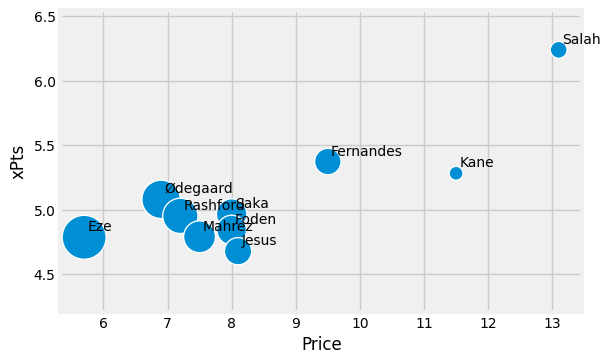

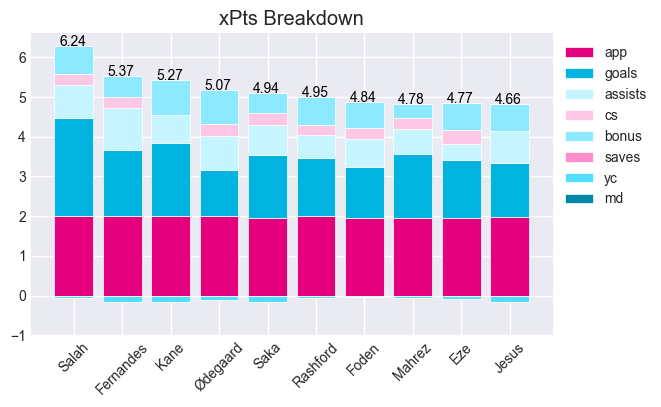

In [8]:
from modules.data_viz import best_options, barplots

#next_gw = 27
horizon = 1
num = 10

df = ev_df[ev_df['Pos']=='G']
df = an_ev_df
best_options(df, next_gw, horizon, num)

ids_list = filter_df(df, next_gw, horizon, '_Pts', 'sum', num)['ID'].to_list()
barplots(an_ev_df, next_gw, horizon, ids_list)

In [10]:
#ev_df = ev_df.drop(['total', 'sum', 'value'], axis=1)
ev_df.to_csv('alex-GW38.csv', index=False)

### Tests

In [83]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def results(df, start_gw, end_gw):
    df = df[(df['gw'] >= start_gw)  & (df['gw'] <= end_gw)]
    n = df.shape[0]
    print('Samples', n)
    y_true = df['rP'].to_list()
    y_pred = df['pP'].to_list()
    y_true_mins = df['rMin'].to_list()
    y_true_mins = df['pMin'].to_list()

    print('RMSE points: ', mean_squared_error(y_true, y_pred, squared=False))
    print('MAE points: ', mean_absolute_error(y_true, y_pred))
    print('R2 Score: ', r2_score(y_true, y_pred))

def model_perf(final, start_gw, end_gw):
    print('Review Premium')
    review_premium = final[final['source']=='review-premium']
    results(review_premium, start_gw, end_gw)
    print()
    print('Review Free')
    review_free = final[final['source']=='review-free']
    results(review_free, start_gw, end_gw)
    print()
    print('Review Odds')
    review_mop = final[final['source']=='review-market-odds-planner']
    results(review_mop, start_gw, end_gw)
    print()
    print('Mikkel')
    mikkel = final[final['source']=='mikkel']
    results(mikkel, start_gw, end_gw)
    print()
    print('Kiwi')
    kiwi = final[final['source']=='kiwi']
    results(kiwi, start_gw, end_gw)
    print()
    print('FFFix')
    fffix = final[final['source']=='fffix']
    results(fffix, start_gw, end_gw)
    print()
    print('FFHub')
    ffhub = final[final['source']=='ffhub']
    results(ffhub, start_gw, end_gw)
    print()
    print('FFScout')
    ffscout = final[final['source']=='ffscout']
    results(ffscout, start_gw, end_gw)
    print()


In [64]:
import pandas as pd

final = pd.read_csv('../final.csv')
final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
review_premium = final[final['source']=='review-premium']
results(review_premium, 26, 38)

Samples 9971
RMSE points:  1.8849245841930855
MAE points:  0.9020983853174206
R2 Score:  0.415727040491803


In [66]:
import pandas as pd

final = pd.read_csv('../final.csv')
final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
final = final[final['rMin']>0]
#final = final[final['id'] == 303]
#final = final[final['pP']>0]
model_perf(final, 26, 38)

Review Premium
Samples 3813
RMSE points:  2.926411500477762
MAE points:  1.9798520849724628
R2 Score:  0.16099933476331996

Review Free
Samples 3813
RMSE points:  2.9309155781338005
MAE points:  1.985609493836874
R2 Score:  0.1584147138072397

Review Odds
Samples 3810
RMSE points:  2.9261430186987214
MAE points:  1.9879160104986875
R2 Score:  0.16154530493596186

Mikkel
Samples 3813
RMSE points:  3.0084433329713844
MAE points:  2.0953422501966954
R2 Score:  0.1133031073591605

Kiwi
Samples 1111
RMSE points:  2.8834041126767898
MAE points:  2.0033267759964
R2 Score:  0.09291849977374822

FFFix
Samples 3810
RMSE points:  3.01702861205109
MAE points:  2.0424849829396328
R2 Score:  0.10865186380269842

FFHub
Samples 3809
RMSE points:  3.0325189725928214
MAE points:  2.172134284112905
R2 Score:  0.09961576092864655

FFScout
Samples 3771
RMSE points:  2.9429814390731805
MAE points:  1.9842482100238663
R2 Score:  0.15726128370426928



In [67]:
import pandas as pd

alex_list = []
for i in range(26,39):
    final = pd.read_csv('../final.csv')
    final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
    final = final[final['gw']==i]
    rp = final[final['source']=='review-premium']
    rp = rp[['id', 'rP', 'rMin']]

    alex_gw = pd.read_csv('../Projections/ALEX/alex-GW' + str(i) + '.csv')
    alex_gw = alex_gw[['ID', 'Team', 'Name', 'Pos', str(i)+'_Pts', str(i)+'_xMins']]
    alex_gw.insert(4, 'gw', [i]*alex_gw.shape[0], True)
    alex_gw.rename(columns={'ID':'id', str(i)+'_Pts':'pP', str(i)+'_xMins':'pMin'}, inplace=True)
    alex_list.append(alex_gw.merge(rp, on='id', how='inner'))
alex = pd.concat(alex_list)
alex[['id', 'gw', 'pP', 'pMin', 'rP', 'rMin']] = alex[['id', 'gw', 'pP', 'pMin', 'rP', 'rMin']].apply(pd.to_numeric)
# optimizations
alex[['pP', 'pMin']] = alex[['pP', 'pMin']].clip(lower=0)
for i in range(alex.shape[0]):
    xmins = alex['pMin'].iloc[i]
    #until gw34 - from 35 it's good
    if xmins < 30:
        alex['pP'].iloc[i] = alex['pP'].iloc[i] - 1 + 0.033*xmins
    if xmins==0:
        alex['pP'].iloc[i] = 0
    if alex['pP'].iloc[i] < 0:
        alex['pP'].iloc[i] = 0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
import pandas as pd

rev_list = []
for i in range(26,39):
    final = pd.read_csv('../final.csv')
    final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
    final = final[final['gw']==i]
    rp = final[final['source']=='review-premium']
    rp = rp[['id', 'rP', 'rMin']]

    rev = pd.read_csv('../Projections/REVIEW-PREMIUM/fplreview_premium-GW' + str(i) + '.csv')
    rev = rev[['ID', 'Team', 'Name', 'Pos', str(i)+'_Pts', str(i)+'_xMins']]
    rev.insert(4, 'gw', [i]*rev.shape[0], True)
    rev.rename(columns={'ID':'id', str(i)+'_Pts':'pP', str(i)+'_xMins':'pMin'}, inplace=True)
    rev_list.append(rev.merge(rp, on='id', how='inner'))
rev_premium = pd.concat(rev_list)
rev_premium[['id', 'gw', 'pP', 'pMin', 'rP', 'rMin']] = rev_premium[['id', 'gw', 'pP', 'pMin', 'rP', 'rMin']].apply(pd.to_numeric)

In [69]:
import pandas as pd

final = pd.read_csv('../final.csv')
final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
rp = final[final['source']=='review-premium']
rf = final[final['source']=='review-free']
mk = final[final['source']=='mikkel']
fix = final[final['source']=='fffix']
scout = final[final['source']=='ffscout']
hub = final[final['source']=='ffhub']
kw = final[final['source']=='kiwi']
aux = alex[['id', 'gw']]
review_premium = rp.merge(aux, on=['id', 'gw'], how='inner')
review_free = rf.merge(aux, on=['id', 'gw'], how='inner')
mikkel = mk.merge(aux, on=['id', 'gw'], how='inner')
fffix = fix.merge(aux, on=['id', 'gw'], how='inner')
ffscout = scout.merge(aux, on=['id', 'gw'], how='inner')
ffhub = hub.merge(aux, on=['id', 'gw'], how='inner')
kiwi = kw.merge(aux, on=['id', 'gw'], how='inner')


In [96]:
#kiwi comparison

aux = kiwi[['id', 'gw']]
alx = alex.merge(aux, on=['id', 'gw'], how='inner')
s = 0
e = 180
alx_aux = alx[(alx['rMin']>=s) & (alx['rMin']<=e)]
kiwi_aux = kiwi[(kiwi['rMin']>=s) & (kiwi['rMin']<=e)]

results(alx_aux, 26, 38)
results(kiwi_aux, 26, 38)

Samples 2317
RMSE points:  2.0934647436044194
MAE points:  1.1282952093223997
R2 Score:  0.33090624560804605
Samples 2317
RMSE points:  2.1211723314874606
MAE points:  1.205795464984031
R2 Score:  0.31307775501963175


until 33 if we include kiwi

In [214]:
#ffhub comparison

aux1 = ffhub[['id', 'gw']]
aux2 = ffscout[['id', 'gw']]
#aux3 = kiwi[['id', 'gw']]
aux4 = rev_premium[['id', 'gw']]
aux5 = fffix[['id', 'gw']]
aux6 = mikkel[['id', 'gw']]
aux = aux1.merge(aux2, on=['id', 'gw'], how='inner')
#aux = aux.merge(aux3, on=['id', 'gw'], how='inner')
aux = aux.merge(aux4, on=['id', 'gw'], how='inner')
aux = aux.merge(aux5, on=['id', 'gw'], how='inner')
aux = aux.merge(aux6, on=['id', 'gw'], how='inner')

alx = alex.merge(aux, on=['id', 'gw'], how='inner')
ffh = ffhub.merge(aux, on=['id', 'gw'], how='inner')
kw = kiwi.merge(aux, on=['id', 'gw'], how='inner')
fff = fffix.merge(aux, on=['id', 'gw'], how='inner')
rev = rev_premium.merge(aux, on=['id', 'gw'], how='inner')
mt = mikkel.merge(aux, on=['id', 'gw'], how='inner')
ffs = ffscout.merge(aux, on=['id', 'gw'], how='inner').drop_duplicates()


s = 1
e = 180
alx_aux = alx[(alx['rMin']>=s) & (alx['rMin']<=e)]
ffhub_aux = ffh[(ffh['rMin']>=s) & (ffh['rMin']<=e)]
ffscout_aux = ffs[(ffs['rMin']>=s) & (ffs['rMin']<=e)]
kiwi_aux = kw[(kw['rMin']>=s) & (kw['rMin']<=e)]
fffix_aux = fff[(fff['rMin']>=s) & (fff['rMin']<=e)]
mikkel_aux = mt[(mt['rMin']>=s) & (mt['rMin']<=e)]
review_aux = rev[(rev['rMin']>=s) & (rev['rMin']<=e)]

results(alx_aux, 26, 38)
results(ffhub_aux, 26, 38)
results(ffscout_aux, 26, 38)
results(kiwi_aux, 26, 38)
results(fffix_aux, 26, 38)
results(mikkel_aux, 26, 38)
results(review_aux, 26, 38)

Samples 3771
RMSE points:  3.004641085207163
MAE points:  2.025942720763723
R2 Score:  0.12157820436107658
Samples 3771
RMSE points:  3.048789909516819
MAE points:  2.18364705219976
R2 Score:  0.0955742952759362
Samples 3771
RMSE points:  2.9429814390731805
MAE points:  1.9842482100238663
R2 Score:  0.15726128370426928
Samples 1100
RMSE points:  2.8440241860721835
MAE points:  1.9746427895354546
R2 Score:  0.10253164841531803
Samples 3771
RMSE points:  3.0302006669072394
MAE points:  2.0548400066295414
R2 Score:  0.10656969610265854
Samples 3771
RMSE points:  3.0315817588765634
MAE points:  2.1127578891540706
R2 Score:  0.10575510278259592
Samples 3771
RMSE points:  2.9494156390782305
MAE points:  1.9986422699549191
R2 Score:  0.15357231931955373


In [100]:
#ffscout comparison

aux = ffscout[['id', 'gw']]
alx = alex.merge(aux, on=['id', 'gw'], how='inner')
s = 0
e = 90
alx_aux = alx[(alx['rMin']>=s) & (alx['rMin']<=e)]
ffscout_aux = ffscout[(ffscout['rMin']>=s) & (ffscout['rMin']<=e)]

results(alx_aux, 26, 38)
results(ffscout_aux, 26, 38)

Samples 6673
RMSE points:  2.183534478779985
MAE points:  1.202302112992657
R2 Score:  0.2544442118231274
Samples 6673
RMSE points:  2.1708227558082034
MAE points:  1.255032219391578
R2 Score:  0.2630996391433613


**Notes**

30-60 pMin players better than review

70-90 pMin players review is better

In [14]:
alex.sort_values(by='pP', ascending=False)

,id,Team,Name,Pos,gw,pP,pMin,rP,rMin
0,318,Man City,Haaland,F,34,11.717,75,16,180
4,283,Liverpool,Salah,M,34,11.544,80,18,173
0,333,Man Utd,Fernandes,M,37,11.389,87,11,175
8,301,Man City,De Bruyne,M,34,10.294,71,0,0
1,124,Brighton,Mitoma,M,29,10.134,77,14,180
...,...,...,...,...,...,...,...,...,...
555,735,Leicester,Marçal-Madivadua,M,33,0.000,0,0,0
554,653,Chelsea,Hutchinson,M,33,0.000,0,0,0
553,654,Crystal Palace,Wells-Morrison,M,33,0.000,2,0,0
552,719,Brighton,Ayari,M,33,0.000,11,0,0


In [93]:
'''
#HAULS/BLANKS
haul = 6
alex_aux = alex[alex['rP']>=haul]
rev_premium_aux = rev_premium[rev_premium['rP']>=haul]
review_premium_aux = review_premium[review_premium['rP']>=haul]
review_free_aux = review_free[review_free['rP']>=haul]
mikkel_aux = mikkel[mikkel['rP']>=haul]
fffix_aux = fffix[fffix['rP']>=haul]
'''
s = 0
e = 91
alex_aux = alex[(alex['pMin']>=s) & (alex['pMin']<=e)]
rev_premium_aux = rev_premium[(rev_premium['pMin']>=s) & (rev_premium['pMin']<=e)]
review_premium_aux = review_premium[(review_premium['pMin']>=s) & (review_premium['pMin']<=e)]
review_free_aux = review_free[(review_free['pMin']>=s) & (review_free['pMin']<=e)]
mikkel_aux = mikkel[(mikkel['pMin']>=s) & (mikkel['pMin']<=e)]
fffix_aux = fffix[(fffix['pMin']>=s) & (fffix['pMin']<=e)]
'''
#BY MINUTES
s = 0
e = 90
alex_aux = alex[(alex['rMin']>=s) & (alex['rMin']<=e)]
rev_premium_aux = rev_premium[(rev_premium['rMin']>=s) & (rev_premium['rMin']<=e)]
review_premium_aux = review_premium[(review_premium['rMin']>=s) & (review_premium['rMin']<=e)]
review_free_aux = review_free[(review_free['rMin']>=s) & (review_free['rMin']<=e)]
mikkel_aux = mikkel[(mikkel['rMin']>=s) & (mikkel['rMin']<=e)]
fffix_aux = fffix[(fffix['rMin']>=s) & (fffix['rMin']<=e)]
'''
'''
#BY POSITION
pos = 'F'
alex_aux = alex[alex['Pos']==pos]
rev_premium_aux = rev_premium[rev_premium['Pos']==pos]
review_premium_aux = review_premium[review_premium['Pos']==pos]               
'''
'''
#BIG HITTERS
alex_aux = alex[(alex['id']==318) | (alex['id']==283) | (alex['id']==124) | (alex['id']==427) | (alex['id']==357) | (alex['id']==133) | (alex['id']==13)]
rev_premium_aux = rev_premium[(rev_premium['id']==318) | (rev_premium['id']==283) | (rev_premium['id']==124) | (rev_premium['id']==427) | (rev_premium['id']==357) | (rev_premium['id']==133) | (rev_premium['id']==13)]
review_premium_aux = review_premium[(review_premium['id']==318) | (review_premium['id']==283) | (review_premium['id']==124) | (review_premium['id']==427) | (review_premium['id']==357) | (review_premium['id']==133) | (review_premium['id']==13)]
mikkel_aux = mikkel[(mikkel['id']==318) | (mikkel['id']==283) | (mikkel['id']==124) | (mikkel['id']==427) | (mikkel['id']==357) | (mikkel['id']==133) | (mikkel['id']==13)]
fffix_aux = fffix[(fffix['id']==318) | (fffix['id']==283) | (fffix['id']==124) | (fffix['id']==427) | (fffix['id']==357) | (fffix['id']==133) | (fffix['id']==13)]
'''
'''
#BY TEAM
team = 'Man City'
alex_aux = alex[alex['Team']==team]
rev_premium_aux = rev_premium[rev_premium['Team']==team]
review_premium_aux = review_premium[review_premium['Team']==team] 
'''
start_gw = 26
end_gw = 38
print('ALEX')
results(alex_aux, start_gw, end_gw)
print()
print('REVIEW PREMIUM WITH THE SAME MINS')
results(rev_premium_aux, start_gw, end_gw)
print()
print('REVIEW PREMIUM')
results(review_premium_aux, start_gw, end_gw)
print()
print('REVIEW FREE')
results(review_free_aux, start_gw, end_gw)
print()
print('MIKKEL')
results(mikkel_aux, start_gw, end_gw)
print()
print('FFFIX')
results(fffix_aux, start_gw, end_gw)

ALEX
Samples 9846
RMSE points:  1.9287004581694598
MAE points:  0.9101835263050987
R2 Score:  0.39427964043470054

REVIEW PREMIUM WITH THE SAME MINS
Samples 9846
RMSE points:  1.9016834647227703
MAE points:  0.9166016656510259
R2 Score:  0.4111304948898815

REVIEW PREMIUM
Samples 9846
RMSE points:  1.8967144468984594
MAE points:  0.9128547633556775
R2 Score:  0.4142038561826602

REVIEW FREE
Samples 9846
RMSE points:  1.9011202162622136
MAE points:  0.9167061750964858
R2 Score:  0.4114792708341659

MIKKEL
Samples 9846
RMSE points:  1.9452137336633057
MAE points:  0.9269043266301035
R2 Score:  0.3838630442760437

FFFIX
Samples 9846
RMSE points:  1.9789291441022925
MAE points:  0.965181766199472
R2 Score:  0.36231956383292374


### Graphs

In [29]:
import pandas as pd

npg_dataset_final = pd.read_csv('./created_datasets/npg_dataset.csv')
assists_dataset = pd.read_csv('./created_datasets/assists_dataset538.csv')
pens_dataset = pd.read_csv('./created_datasets/pens_dataset.csv')
saves_dataset = pd.read_csv('./created_datasets/saves_dataset.csv')
bps_dataset = pd.read_csv('./created_datasets/bps_dataset.csv')


In [36]:
bps_dataset

,bonusp90,position,npxGp90,xAp90,npxGAp90,opp_npxGp90,opp_npxGAp90,minutes,was_home,bonus
0,0.000000,3,0.047185,0.021487,1.603144,1.240624,1.193515,85,False,0
1,0.000000,3,0.058353,0.029282,1.628964,0.811236,1.841220,88,False,0
2,0.000000,3,0.176132,0.060163,1.601297,2.022634,0.946348,82,True,0
3,0.000000,3,0.151468,0.059391,1.619451,1.368077,1.051573,58,False,0
4,0.000000,3,0.137636,0.053967,1.679854,1.457483,1.170328,22,True,0
...,...,...,...,...,...,...,...,...,...,...
47538,0.400000,1,0.000000,0.000000,1.283912,1.081400,1.590443,90,False,0
47539,0.375000,1,0.000000,0.000000,1.280326,1.548264,1.137279,90,True,0
47540,0.352941,1,0.000000,0.000000,1.348970,1.102438,1.352085,90,False,0
47541,0.333333,1,0.000000,0.000000,1.331375,1.026986,1.105956,90,True,3


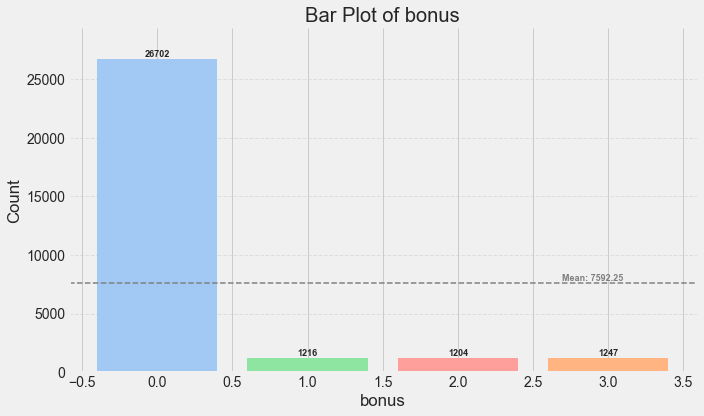

In [37]:
from modules.graphs  import count_barplot
bps_dataset_aux = bps_dataset[bps_dataset['minutes']>0]
count_barplot(bps_dataset_aux['bonus'].value_counts(), 'bonus')

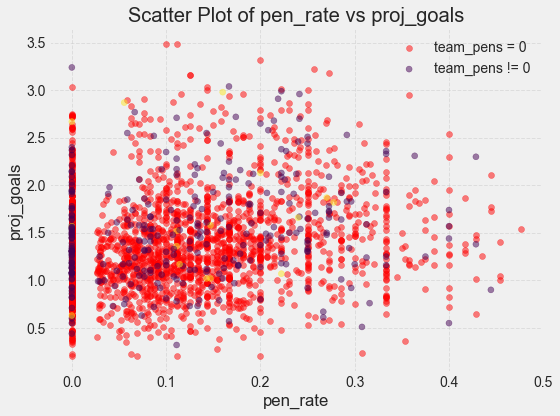

In [23]:
from modules.graphs  import scatterplot

pens_dataset_aux = pens_dataset[pens_dataset['pen_rate']<0.5]
scatterplot(pens_dataset_aux, 'pen_rate', 'proj_goals', 'team_pens')

In [ ]:
from modules.graphs  import scatterplot

assists_dataset_aux = assists_dataset[(assists_dataset['xAp90l100']<0.7) & (assists_dataset['assist_ratel100']<0.7)]
scatterplot(pens_dataset, 'pen_rate', 'spi_opp_team', 'team_pens')

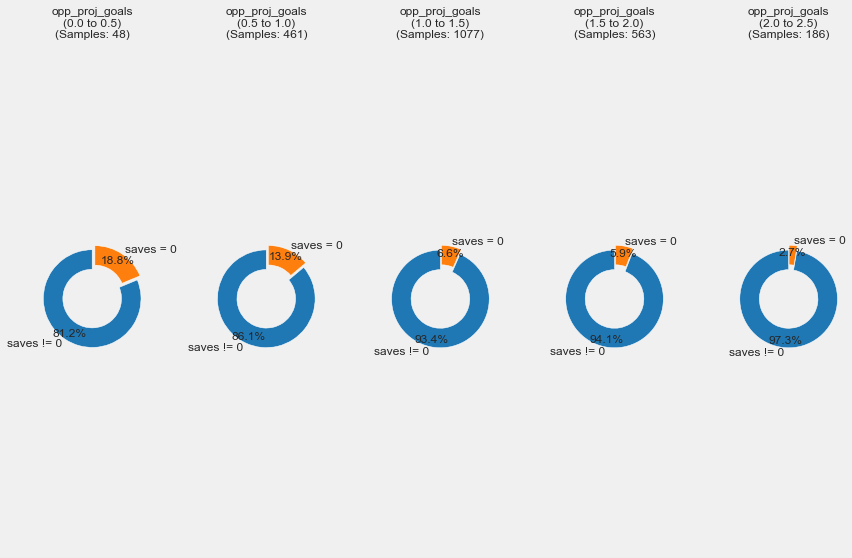

In [35]:
from modules.graphs  import plot_percentages

saves_dataset_aux = saves_dataset[saves_dataset['minutes']>0]
plot_percentages(saves_dataset_aux, 'opp_proj_goals', 0, 2.5, 0.5, 'saves')